1072
<class 'list'>
2


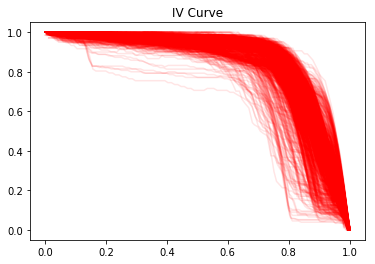

In [12]:
import csv
from matplotlib import pyplot as plt
%matplotlib inline

def LoadTabCSV(FileName):    
    f = open(FileName, 'rt')
    reader = csv.reader(f, delimiter='\t')
    CSVData = list(reader)
    CSVData = CSVData[1:]
    Ans=[]
    for Line in CSVData:
        Tmp = []
        volt1Str = Line[0].split(',')
        volt1 = [float(i) for i in volt1Str] 
        maxv = max(volt1)
        volt1 = [i/maxv for i in volt1] 
        
        current1Str = Line[1].split(',')
        current1 = [float(i) for i in current1Str] 
        maxi = max(current1)
        current1 = [i/maxi for i in current1] 
        
        Tmp.append(volt1)
        Tmp.append(current1)
        Ans.append(Tmp)
       
    return Ans

NG = LoadTabCSV("IVData_1_NG.txt")
Good = LoadTabCSV("IVData_ALL_OK.txt")
print(len(NG))
print(type(NG))
print(len(NG[0]))


'''for Line in Gofor Line in Good:
    # 畫個圖看看
    volt1 = Line[0]
    current1 = Line[1]
    plt.plot(volt1, current1, color='blue', alpha=0.1)
    plt.title('IV Curve')
    '''
    
for Line in NG:
    # 畫個圖看看
    volt1 = Line[0]
    current1 = Line[1]
    plt.plot(volt1, current1, color='Red', alpha=0.1)
    plt.title('IV Curve')

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

#把資料轉成tensorflow格式 筆數，y, x, 1
NG_np = np.array(NG)
NG_np = NG_np[..., np.newaxis]
NG_Y =  np.full((NG_np.shape[0], 1), 1)
Good_np = np.array(Good) #輸出1是 NG
Good_np = Good_np[..., np.newaxis]
Good_Y =  np.full((Good_np.shape[0], 1), 0)  #輸出0是 Good

#資料合併
AllX = np.vstack((NG_np,Good_np))
AllY = np.vstack((NG_Y,Good_Y))

#資料分割
x_train, x_test, y_train, y_test = train_test_split(AllX,AllY,test_size = 0.2,random_state=87)


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (2, 4), activation='relu',padding = 'SAME', input_shape=(2, 128, 1)))
model.add(layers.MaxPooling2D((1, 4)))

model.add(layers.Conv2D(64, (2, 4), activation='relu',padding = 'SAME'))
model.add(layers.MaxPooling2D((1, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu',padding = 'SAME'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 128, 32)        288       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 32, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 32, 64)         16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 16, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 16, 64)         16448     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [8]:
#訓練
history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100
52/52 [==============================] - 1s 11ms/step - loss: 0.4451 - accuracy: 0.8004 - val_accuracy: 0.8365 - val_loss: 0.3489
Epoch 2/100
52/52 [==============================] - 0s 9ms/step - loss: 0.3251 - accuracy: 0.8641 - val_accuracy: 0.8486 - val_loss: 0.3199
Epoch 3/100
52/52 [==============================] - 0s 8ms/step - loss: 0.2933 - accuracy: 0.8779 - val_accuracy: 0.8774 - val_loss: 0.2710
Epoch 4/100
52/52 [==============================] - 0s 8ms/step - loss: 0.2456 - accuracy: 0.9074 - val_accuracy: 0.8966 - val_loss: 0.2466
Epoch 5/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1975 - accuracy: 0.9363 - val_accuracy: 0.9519 - val_loss: 0.1661
Epoch 6/100
52/52 [==============================] - 0s 8ms/step - loss: 0.1591 - accuracy: 0.9447 - val_accuracy: 0.9543 - val_loss: 0.1306
Epoch 7/100
52/52 [==============================] - 0s 9ms/step - loss: 0.1255 - accuracy: 0.9591 - val_accuracy: 0.9303 - val_loss: 0.1712
Epoch 8/100


Epoch 59/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0465 - accuracy: 0.9850 - val_accuracy: 0.9856 - val_loss: 0.0428
Epoch 60/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0319 - accuracy: 0.9904 - val_accuracy: 0.9784 - val_loss: 0.0475
Epoch 61/100
52/52 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9838 - val_accuracy: 0.9784 - val_loss: 0.0656
Epoch 62/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 0.9880 - val_accuracy: 0.9591 - val_loss: 0.1201
Epoch 63/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0376 - accuracy: 0.9862 - val_accuracy: 0.9712 - val_loss: 0.0591
Epoch 64/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9892 - val_accuracy: 0.9856 - val_loss: 0.0400
Epoch 65/100
52/52 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.9910 - val_accuracy: 0.9856 - val_loss: 0.0481
Epoch 

In [9]:
history.history.keys()

dict_keys(['val_accuracy', 'val_loss', 'loss', 'accuracy'])

13/13 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9856
準確率:0.9855769276618958


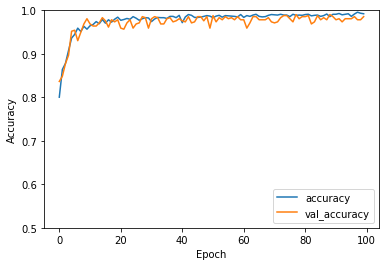

In [10]:
#plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)
print ("準確率:{}".format(test_acc))

In [13]:
#輸入實際曲線運算
#preds = model.predict_classes(x_test)
preds = np.argmax(model.predict(x_test), axis=-1)
print (preds)
print (y_test[:,0])

[0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 0]
[0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1
 0 1 